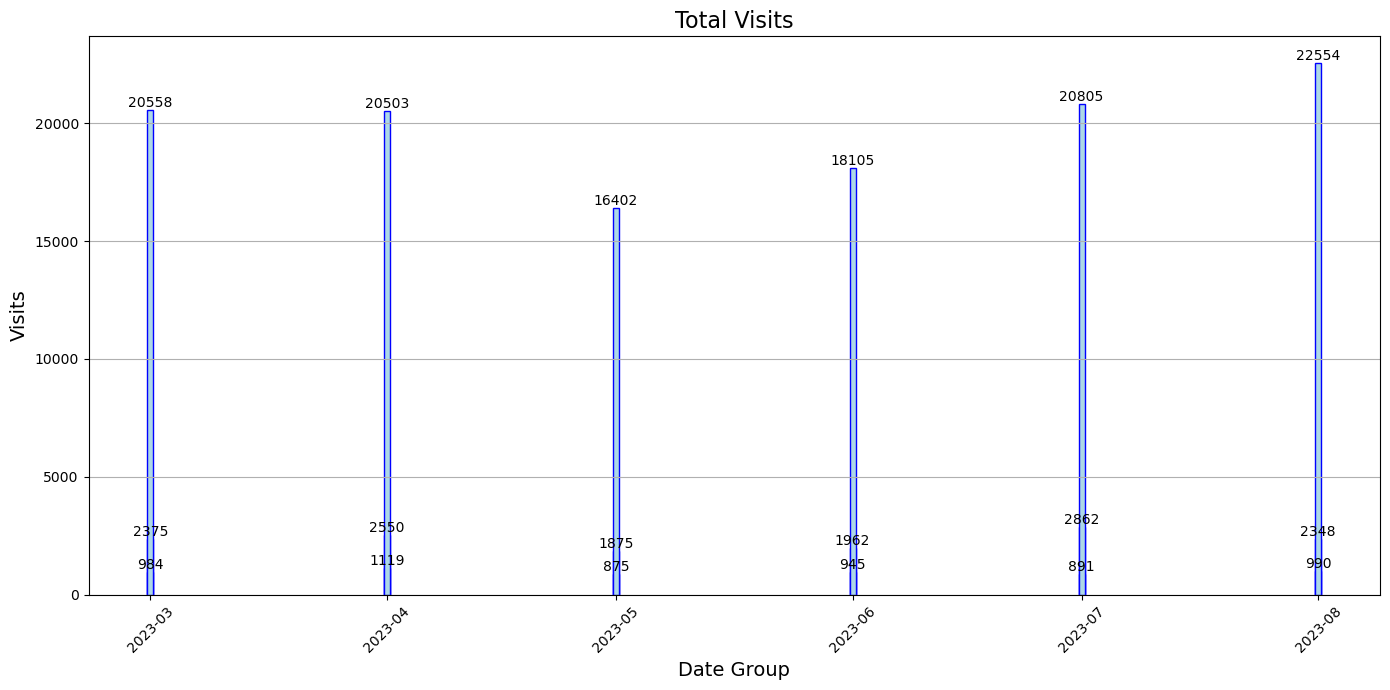

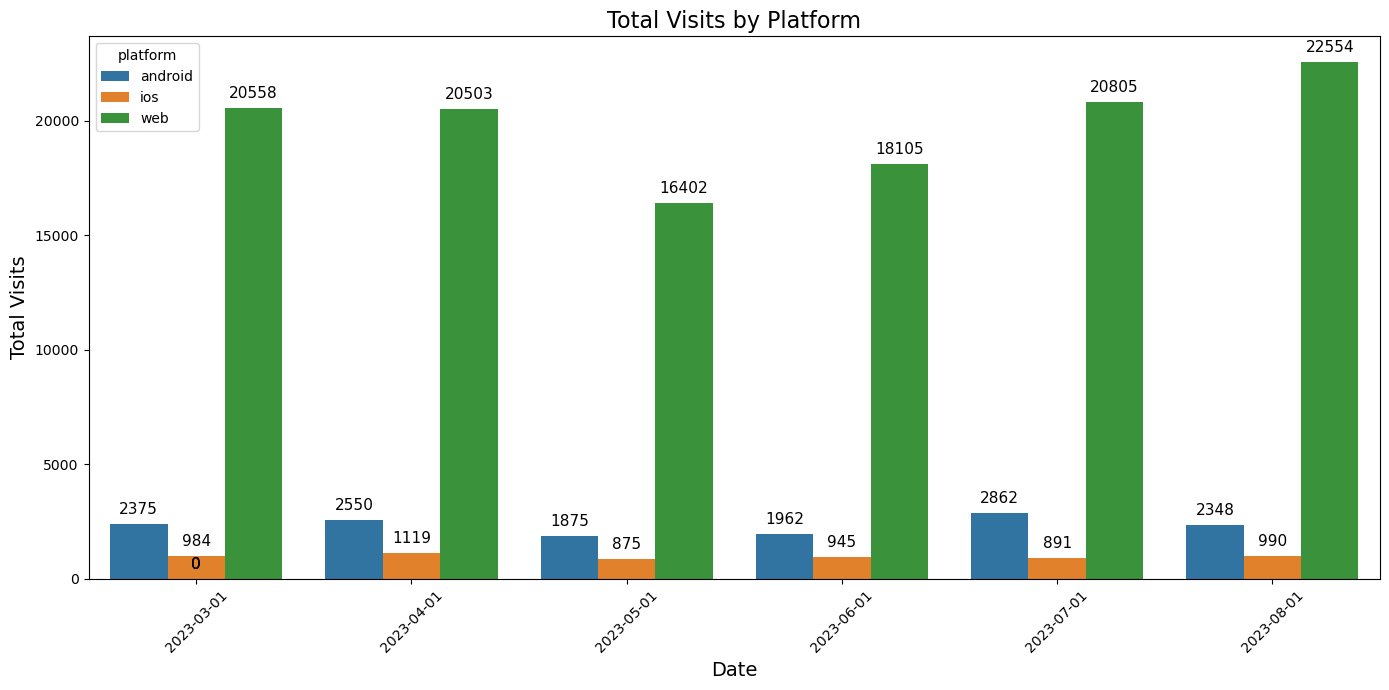

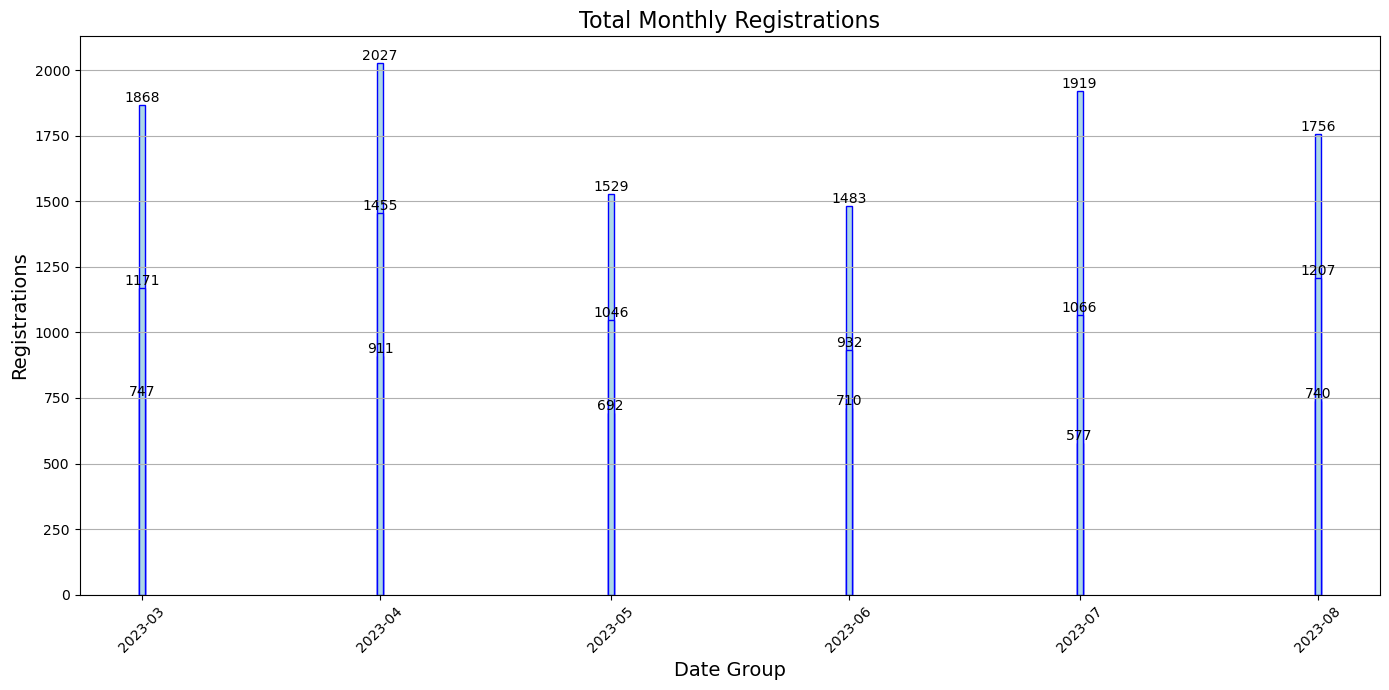

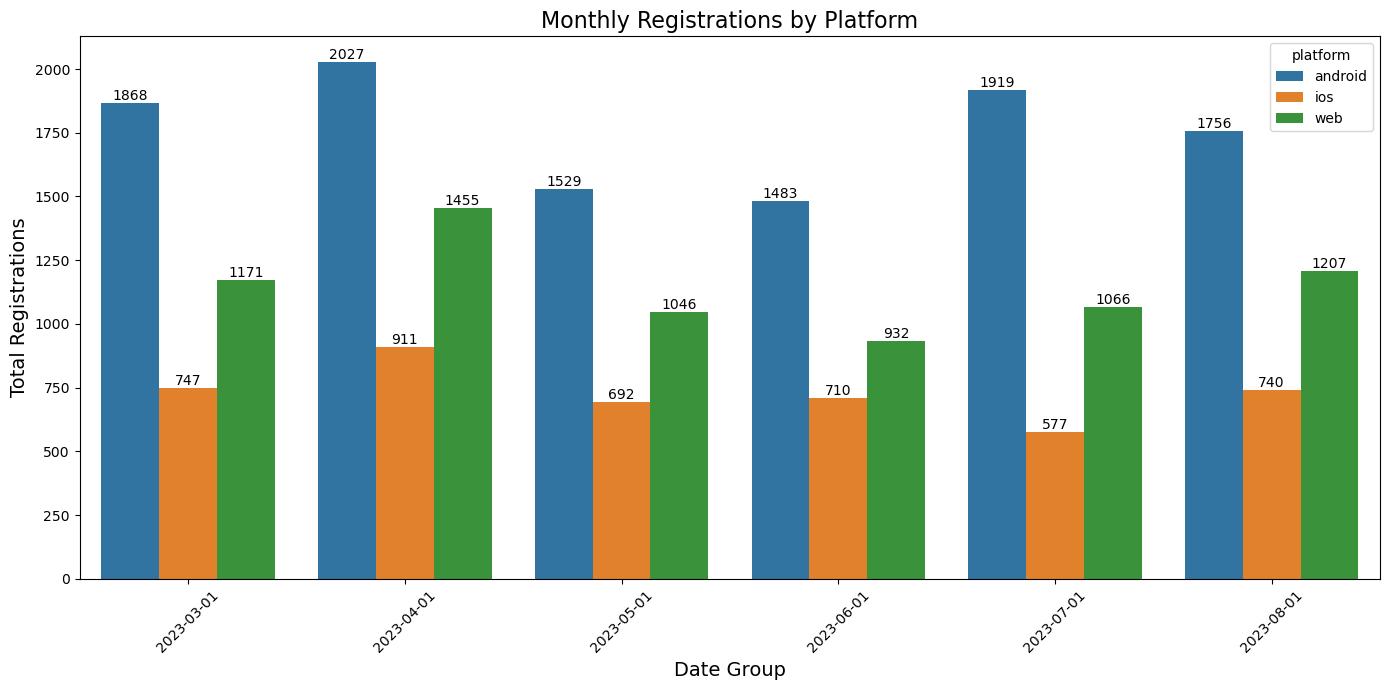

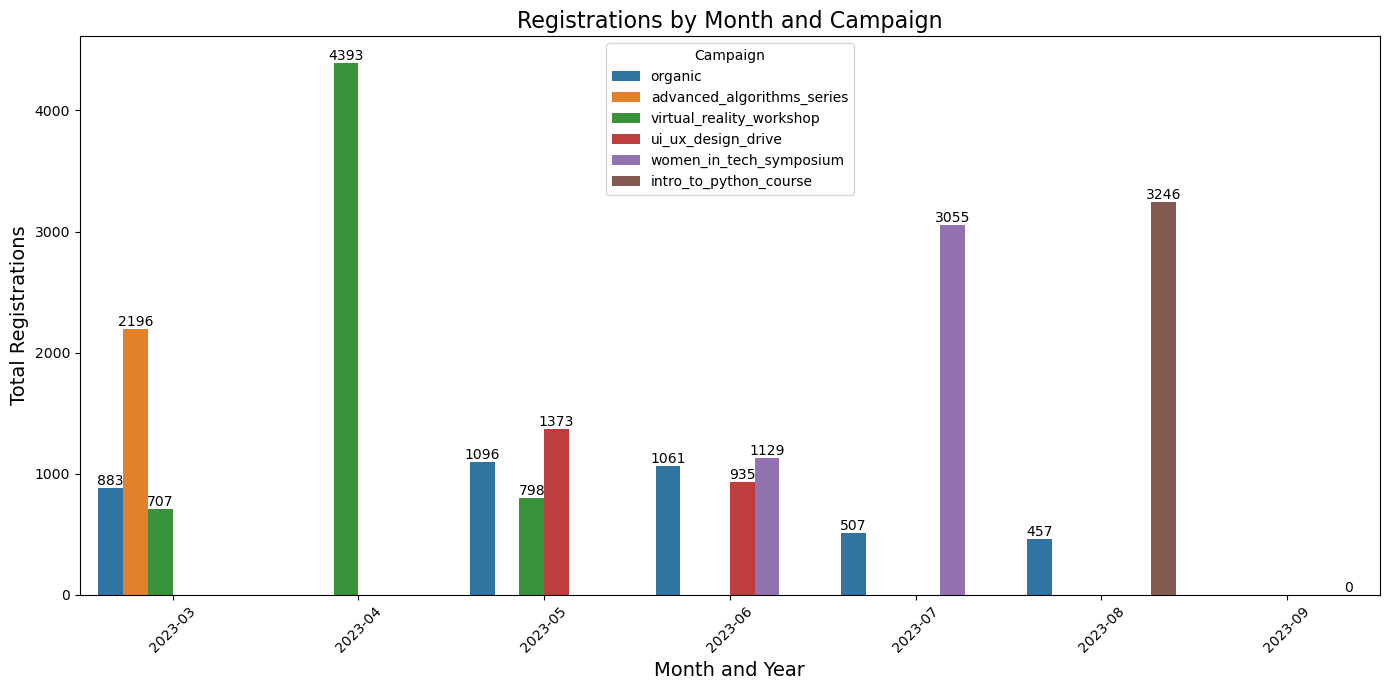

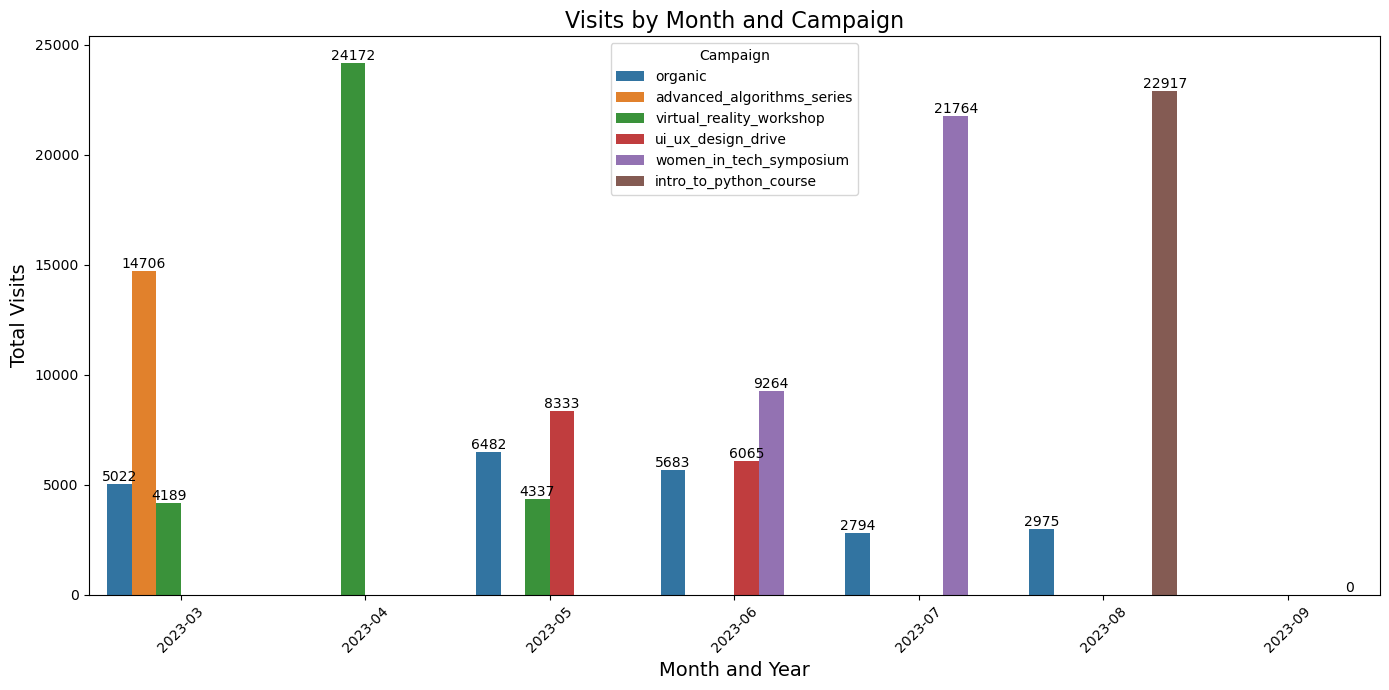

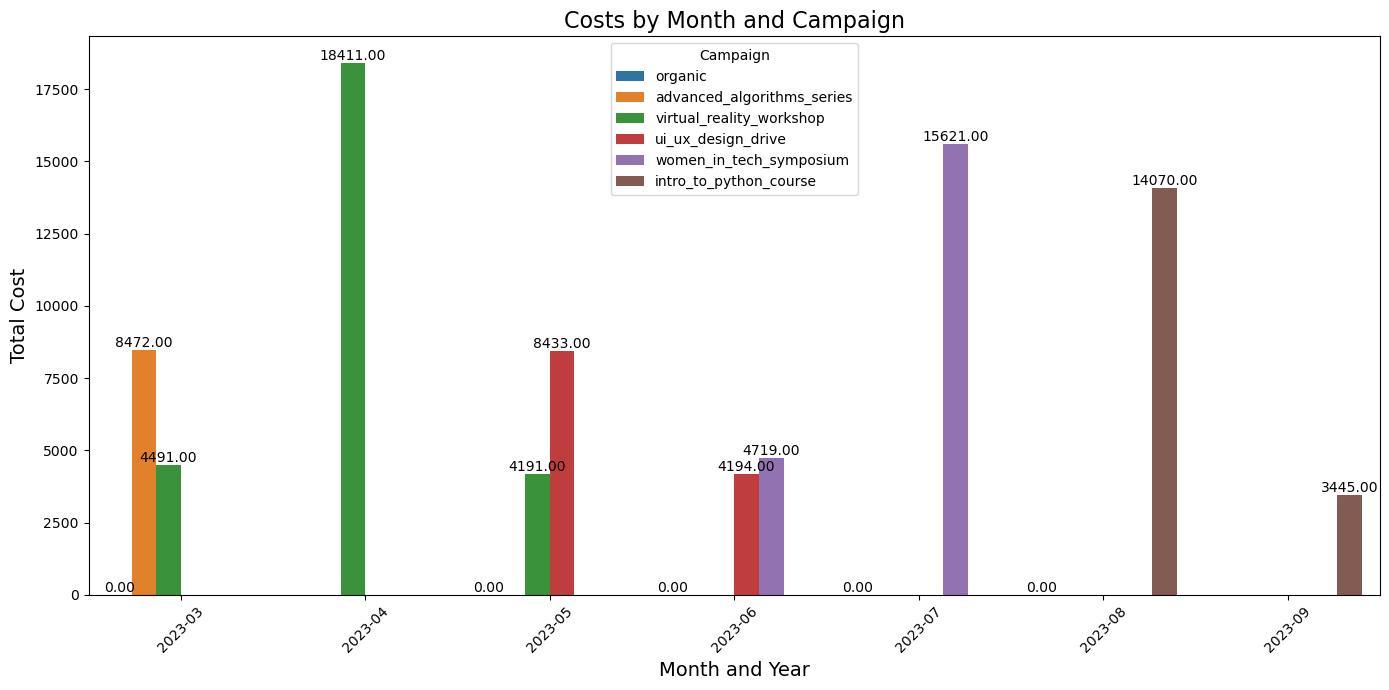

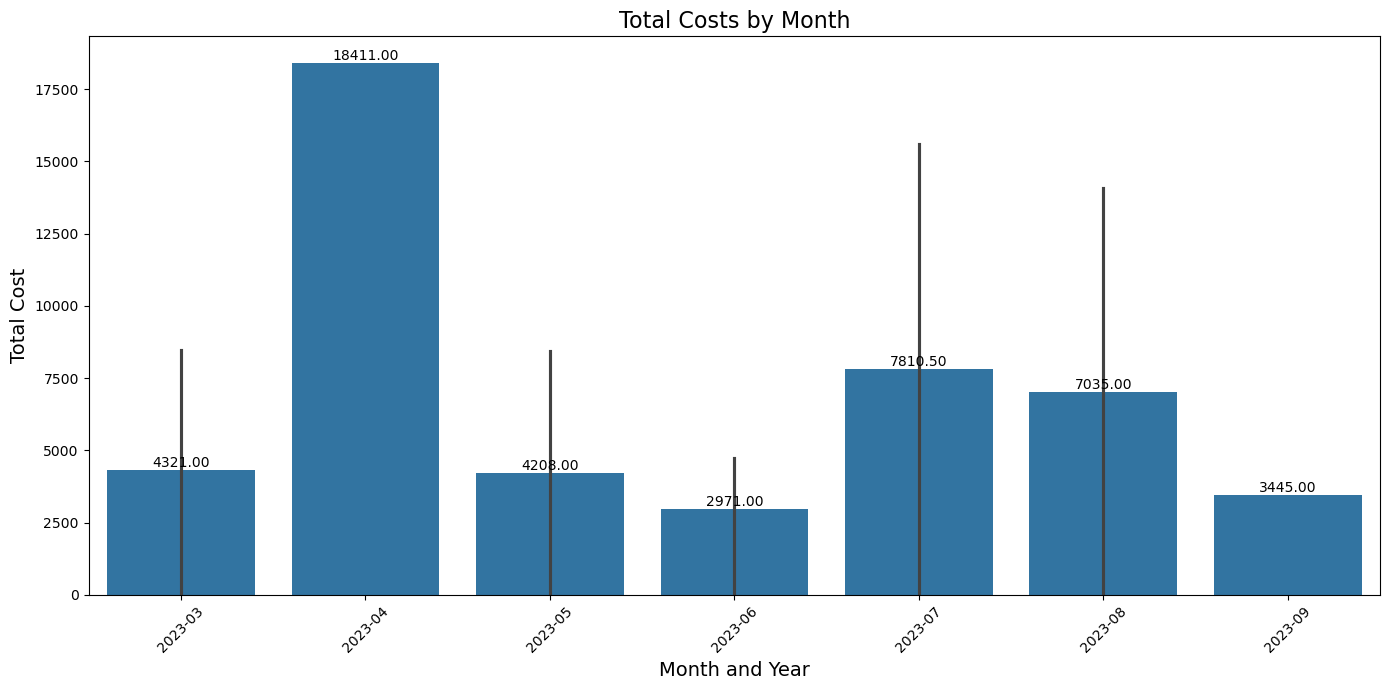

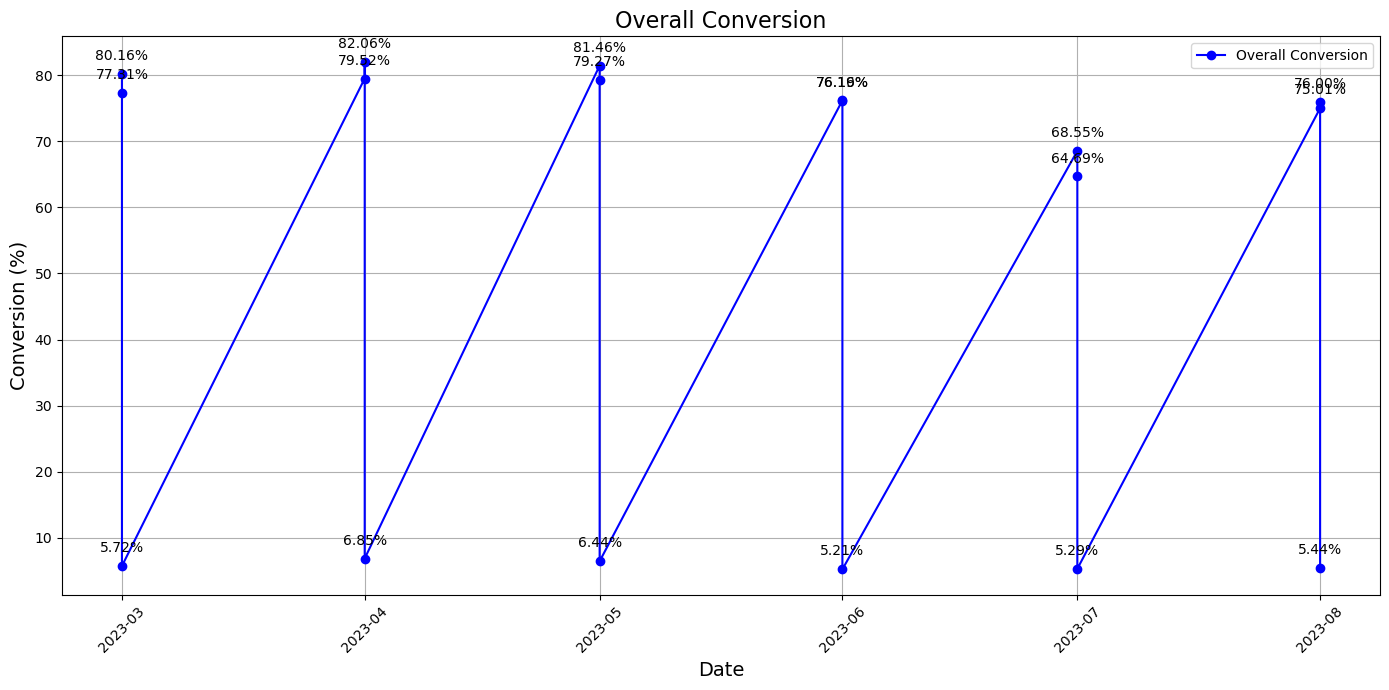

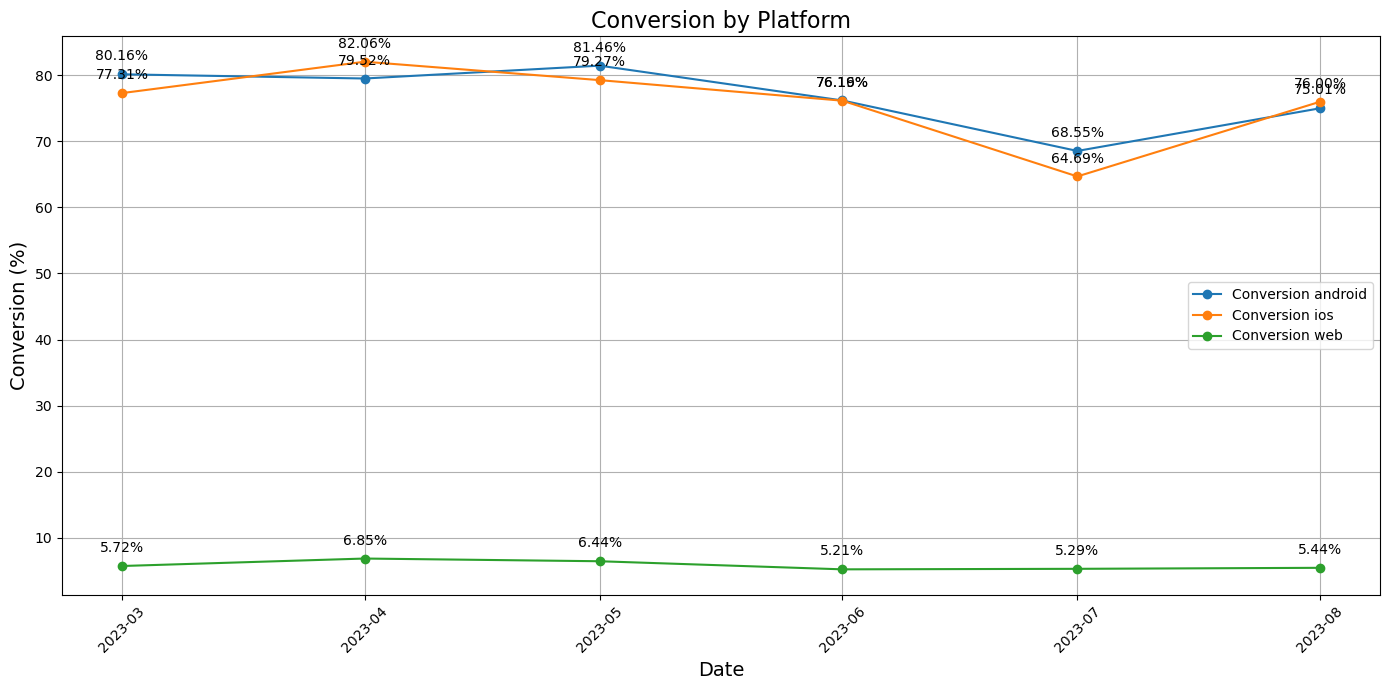

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Создаем директорию ./charts, если она не существует
os.makedirs("./charts", exist_ok=True)

# Загружаем все источники
visits = pd.read_json("visits.json")
conversion = pd.read_json("conversion.json")
ads = pd.read_json("ads.json")
registration = pd.read_json("registrations.json")

# Готовим conversion
conversion['date_group'] = pd.to_datetime(conversion['date_group'], unit='ms')
conversion['month'] = conversion['date_group'].dt.to_period('M')
conversion.to_excel('conversion_excel.xlsx', index=False)

# Группировка по месяцу и агрегация данных
monthly_grouped = conversion.groupby(['month', 'platform']).agg({
    'visits': 'sum',
    'registrations': 'sum',
    'conversion': 'mean'
}).reset_index()

# Преобразуем 'month' обратно в стандартный формат даты
monthly_grouped['month'] = monthly_grouped['month'].dt.to_timestamp()

# Переименуем столбцы для удобства
monthly_grouped.rename(columns={'month': 'date_group'}, inplace=True)

# Сохраняем агрегированные данные
conversion = monthly_grouped
conversion["date_group"] = pd.to_datetime(conversion["date_group"]).dt.date

# Готовим рекламную кампанию
ads['date_group'] = pd.to_datetime(ads['date_group'], unit='ms')
ads['month_year'] = ads['date_group'].dt.to_period('M')

# Группируем по месяцу и utm_campaign и суммируем остальные показатели
grouped_ads = ads.groupby(['month_year', 'utm_campaign']).agg({
    'visits': 'sum',
    'registrations': 'sum',
    'cost': 'sum'
}).reset_index()

# Заменяем значения 0 на 'organic' в колонке utm_campaign
grouped_ads['utm_campaign'] = grouped_ads['utm_campaign'].replace(0, 'organic')


def plot_visits_by_campaign(start_date=None, end_date=None):
    filtered_data = grouped_ads
    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x='month_year', y='visits', hue='utm_campaign', data=filtered_data)
    plt.title("Visits by Month and Campaign", fontsize=16)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Total Visits", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Campaign')
    plt.tight_layout()

    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

    plt.savefig("./charts/visits_by_campaign.png")
    plt.show()

def plot_registrations_by_campaign(start_date=None, end_date=None):
    filtered_data = grouped_ads
    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x='month_year', y='registrations', hue='utm_campaign', data=filtered_data)
    plt.title("Registrations by Month and Campaign", fontsize=16)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Total Registrations", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Campaign')
    plt.tight_layout()

    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

    plt.savefig("./charts/registrations_by_campaign.png")
    plt.show()

def plot_visits_by_campaign(start_date=None, end_date=None):
    filtered_data = grouped_ads  # Предполагаю, что grouped_ads содержит необходимые данные
    plt.figure(figsize=(14, 7))
    
    # Изменяем y='registrations' на y='visits'
    bar_plot = sns.barplot(x='month_year', y='visits', hue='utm_campaign', data=filtered_data)
    
    plt.title("Visits by Month and Campaign", fontsize=16)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Total Visits", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Campaign')
    plt.tight_layout()

    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

    plt.savefig("./charts/visits_by_campaign.png")
    plt.show()

def plot_total_visits(start_date=None, end_date=None):
    filtered_data = conversion    
    plt.figure(figsize=(14, 7))
    bars = plt.bar(
        filtered_data["date_group"], 
        filtered_data["visits"], 
        color="lightblue", 
        edgecolor="blue"
    )
    plt.title("Total Visits", fontsize=16)
    plt.xlabel("Date Group", fontsize=14)
    plt.ylabel("Visits", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            ha="center",
            va="bottom",
            fontsize=10,
        )
    
    plt.tight_layout()
    plt.savefig("./charts/total_visits.png")
    plt.show()

def plot_total_visits_by_platform(start_date=None, end_date=None):
    filtered_data = conversion   
    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x="date_group", y="visits", data=filtered_data, hue="platform")
    
    for p in bar_plot.patches:
        bar_plot.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=11,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    plt.title("Total Visits by Platform", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Visits", fontsize=14)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig("./charts/total_visits_by_platform.png")
    plt.show()

def plot_total_registrations(start_date=None, end_date=None):
    filtered_data = conversion
    plt.figure(figsize=(14, 7))
    bars = plt.bar(
        filtered_data["date_group"],
        filtered_data["registrations"],
        color="lightblue",
        edgecolor="blue",
    )
    plt.title("Total Monthly Registrations", fontsize=16)
    plt.xlabel("Date Group", fontsize=14)
    plt.ylabel("Registrations", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            ha="center",
            va="bottom",
            fontsize=10,
        )
    
    plt.tight_layout()
    plt.savefig("./charts/total_registrations.png")
    plt.show()

def plot_registrations_by_platform(start_date=None, end_date=None):
    filtered_data = conversion
    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x="date_group", y="registrations", data=filtered_data, hue="platform")
    plt.title("Monthly Registrations by Platform", fontsize=16)
    plt.xlabel("Date Group", fontsize=14)
    plt.ylabel("Total Registrations", fontsize=14)
    plt.xticks(rotation=45)
    
    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.0f', label_type='edge')

    plt.tight_layout()
    plt.savefig("./charts/registrations_by_platform.png")
    plt.show()

def plot_overall_conversion(start_date=None, end_date=None):
    filtered_data = conversion
    plt.figure(figsize=(14, 7))
    plt.plot(
        filtered_data["date_group"],
        filtered_data["conversion"],
        marker="o",
        linestyle="-",
        color="b",
        label="Overall Conversion",
    )
    
    for i, txt in enumerate(filtered_data["conversion"]):
        plt.annotate(
            f"{txt:.2f}%",
            (filtered_data["date_group"].iloc[i], filtered_data["conversion"].iloc[i]),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )
    
    plt.title("Overall Conversion", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Conversion (%)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("./charts/overall_conversion.png")
    plt.show()

def plot_conversion_by_platform(platforms=None, start_date=None, end_date=None):
    filtered_data = conversion
   
    plt.figure(figsize=(14, 7))
    
    # Группируем данные по датам и платформам
    grouped_data = filtered_data.groupby(['date_group', 'platform']).agg({'conversion': 'mean'}).reset_index()
    
    # Для каждой платформы создаем линию на графике
    for platform in grouped_data['platform'].unique():
        platform_data = grouped_data[grouped_data['platform'] == platform]
        plt.plot(
            platform_data["date_group"],
            platform_data["conversion"],
            marker="o",
            linestyle="-",
            label=f"Conversion {platform}",
        )
        
        # Добавляем аннотации к каждой точке
        for i, txt in enumerate(platform_data["conversion"]):
            plt.annotate(
                f"{txt:.2f}%",
                (platform_data["date_group"].iloc[i], platform_data["conversion"].iloc[i]),
                textcoords="offset points",
                xytext=(0, 10),
                ha="center",
            )
    
    plt.title("Conversion by Platform", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Conversion (%)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("./charts/conversion_by_platform.png")
    plt.show()



def plot_costs_by_campaign(start_date=None, end_date=None):
    filtered_data = grouped_ads
    if start_date:
        filtered_data = filtered_data[filtered_data["month_year"] >= pd.to_datetime(start_date).to_period('M')]
    if end_date:
        filtered_data = filtered_data[filtered_data["month_year"] <= pd.to_datetime(end_date).to_period('M')]

    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x='month_year', y='cost', hue='utm_campaign', data=filtered_data)
    plt.title("Costs by Month and Campaign", fontsize=16)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Total Cost", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Campaign')
    plt.tight_layout()

    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.2f', label_type='edge')

    plt.savefig("./charts/costs_by_campaign.png")
    plt.show()
    
def plot_total_costs(start_date=None, end_date=None):
    filtered_data = grouped_ads
    if start_date:
        filtered_data = filtered_data[filtered_data["month_year"] >= pd.to_datetime(start_date).to_period('M')]
    if end_date:
        filtered_data = filtered_data[filtered_data["month_year"] <= pd.to_datetime(end_date).to_period('M')]

    plt.figure(figsize=(14, 7))
    bar_plot = sns.barplot(x='month_year', y='cost', data=filtered_data)
    plt.title("Total Costs by Month", fontsize=16)
    plt.xlabel("Month and Year", fontsize=14)
    plt.ylabel("Total Cost", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Добавление подписей данных
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.2f', label_type='edge')

    plt.savefig("./charts/total_costs.png")
    plt.show()

# Пример использования:
# Задаем даты начала и конца для фильтрации (если нужно)
#start_date = "2023-01-01"  
# end_date = "2023-12-31" 

# Вызываем функции для построения графиков
plot_total_visits(start_date, end_date)
plot_total_visits_by_platform(start_date, end_date)
plot_total_registrations(start_date, end_date)
plot_registrations_by_platform(start_date, end_date)
plot_registrations_by_campaign(start_date, end_date)
plot_visits_by_campaign(start_date, end_date)
plot_costs_by_campaign(start_date, end_date)
plot_total_costs(start_date, end_date)
plot_overall_conversion(start_date, end_date)
plot_conversion_by_platform(start_date, end_date)